# Data Explatory

In [12]:
#loading data
import pandas as pd
import numpy as np

In [9]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB (1).csv


In [14]:
import io

df= pd.read_csv(io.BytesIO(uploaded['marketing_AB.csv']))
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [15]:
unique_values=df['test group'].unique()
print(unique_values)

['ad' 'psa']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [17]:
#cek duplicated data

In [18]:
df.duplicated(["user id"]).sum()

0

In [19]:
#change value converted to int from string
df['converted'] = df['converted'].replace({True: 1, False: 0})
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  int64 
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 31.4+ MB


In [21]:
#data control
df_control=df[df['test group']=="psa"]
df_control.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
18,18,900681,psa,0,248,Saturday,19
38,38,905704,psa,0,27,Thursday,8
68,68,904595,psa,0,13,Tuesday,19
140,140,901904,psa,0,32,Wednesday,19
157,157,902234,psa,0,105,Tuesday,19


In [22]:
#users in control group
n_control=df_control.shape[0]
n_control

23524

In [23]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 18 to 588081
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     23524 non-null  int64 
 1   user id        23524 non-null  int64 
 2   test group     23524 non-null  object
 3   converted      23524 non-null  int64 
 4   total ads      23524 non-null  int64 
 5   most ads day   23524 non-null  object
 6   most ads hour  23524 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


In [24]:
# user converted from control group

# find converted user from control group
df_control_convert = df_control[df_control["converted"] == 1]

# count how many user converted
n_control_convert = df_control_convert.shape[0]

n_control_convert

420

In [25]:
#data treatment
df_treatment=df[df['test group']=="ad"]
df_treatment.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [26]:
df_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564577 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     564577 non-null  int64 
 1   user id        564577 non-null  int64 
 2   test group     564577 non-null  object
 3   converted      564577 non-null  int64 
 4   total ads      564577 non-null  int64 
 5   most ads day   564577 non-null  object
 6   most ads hour  564577 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 34.5+ MB


In [27]:
#users in treatment group
n_treatment=df_treatment.shape[0]
n_treatment

564577

In [28]:
# user converted from treatment group

# find converted user from treatmet group
df_treatment_convert = df_treatment[df_treatment["converted"] == 1]

# count how many user converted
n_treatment_convert = df_treatment_convert.shape[0]

n_treatment_convert

14423

In [29]:
#define convertion rate
#controlgroup
cr_control=n_control_convert/n_control
cr_control


0.01785410644448223

In [30]:
#treatment group
cr_treatment=n_treatment_convert/n_treatment
cr_treatment

0.025546559636683747

Summary All Dataset
<center>

|Group|#User|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|564577|420|0.0178|
|Treatment|23524|564577|0.0255|

</center>

# Designing Experiments

In [31]:
#Sample size
from scipy import stats

#setting parameter
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power
std_dev = 0.07      # variance of population (assumed / approximated)

# calculate beta
beta = 1 - power

# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 769.19


In [32]:
#sampling from treatment ad
sample_treatment = df_treatment.sample(n=770, random_state=1)
sample_treatment.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
60858,60858,1525830,ad,0,5,Saturday,17
50703,50703,1513094,ad,0,59,Thursday,10
552126,552126,1475135,ad,0,6,Tuesday,13
165249,165249,1635331,ad,0,96,Tuesday,19
290461,290461,1499483,ad,1,119,Saturday,15


In [43]:
#sampling from control psa
sample_control = df_control.sample(n=770, random_state=1)
sample_control.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
67034,67034,901932,psa,0,139,Saturday,15
35349,35349,915417,psa,0,6,Friday,0
62023,62023,917589,psa,0,39,Saturday,13
546552,546552,900967,psa,0,11,Monday,17
73802,73802,912104,psa,0,42,Saturday,18


In [34]:
# Number of users in the control group
n_control =sample_control.shape[0]
n_control

770

In [35]:
# Number of users in the treatment group
n_treatment = sample_treatment.shape[0]
n_treatment

770

In [36]:
# Percentage in each group
n_total = n_treatment + n_control
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.00%
% treatment : 50.00%


In [46]:
observed = [ n_control, n_treatment ]
total_show= sum(observed)
expected = [ total_show/2, total_show/2 ]

In [47]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)

# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.01
df=(2-1)*(2-1)

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Critical value: 6.635
Fail to reject H0 : No SRM


In [48]:
# CR in sample control & treatment
n_convert_cont = (sample_control['converted']).value_counts()[1]
n_convert_treat = (sample_treatment['converted']).value_counts()[1]
print(f"Jumlah User_id yang convert pada grup control (PSA) adalah sebanyak     : {n_convert_cont}")
print(f"Jumlah User_id yang convert pada grup treatment (Ad) adalah sebanyak    : {n_convert_treat}")

Jumlah User_id yang convert pada grup control (PSA) adalah sebanyak     : 12
Jumlah User_id yang convert pada grup treatment (Ad) adalah sebanyak    : 22


In [49]:
# Mencari Convert rate Masing-masing grup
conv_rate_cont = n_convert_cont/n_control
conv_rate_treat = n_convert_treat/n_treatment

print(f"Convert rate grup control (PSA)  : {conv_rate_cont:.3f}")
print(f"Convert rate grup treatment (Ad) : {conv_rate_treat:.3f}")

Convert rate grup control (PSA)  : 0.016
Convert rate grup treatment (Ad) : 0.029


<ipython-input-50-42a4510dcc7d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


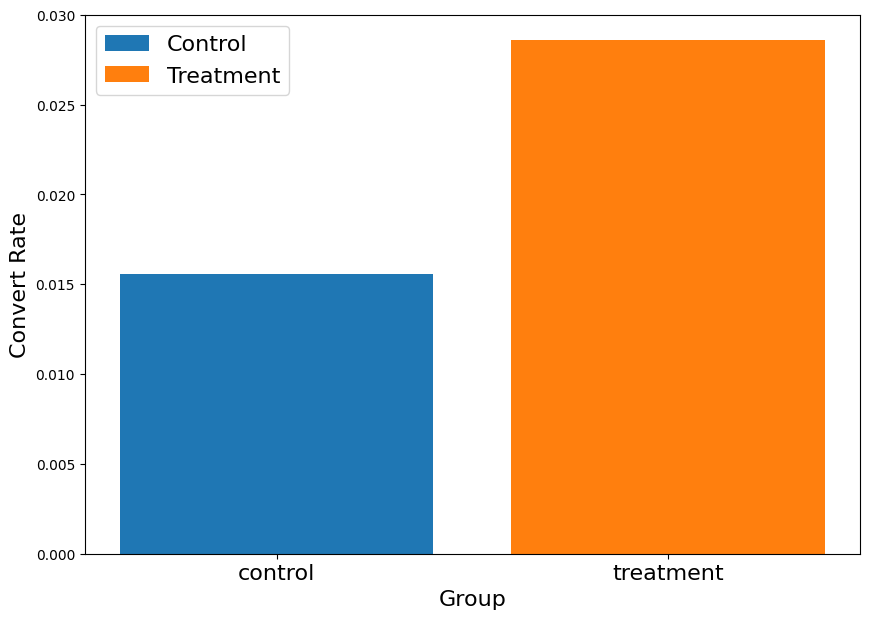

In [50]:
# visualisasi perbandingan convert rate tiap grup
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", conv_rate_cont, label="Control")
ax.bar("treatment", conv_rate_treat, label="Treatment")

# Styling plot
ax.set_ylabel("Convert Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()



# Statistical Analytics

In [51]:
# Import library ini untuk melakukan perhitungan
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [52]:
# Buat count convert & total observation
count_convert = [n_convert_treat, n_convert_cont]
count_observation = [n_treatment, n_control]

# Buat alternative hipotesis, dalam kasus ini adalah alternative yang lebih besar
alternative_option = "larger"

In [53]:
print(count_convert)
print(count_observation)

[22, 12]
[770, 770]


In [54]:
# Selanjutnya yaitu melakukan pengujian
# import library
from statsmodels.stats.proportion import proportions_ztest

# Panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 1.7342
P-value : 0.0414


In [56]:
from scipy import stats

# critical value
alpha= 0.05
z_crit = stats.norm.ppf(1-alpha)

print(f"z critical value : {z_crit:.4f}")

z critical value : 1.6449


In [57]:
#Melakukan pengambilan keputusan dari z-stats dan z-crit
if z_stat > z_crit:
  print("Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan\
  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA")
else:
  print("Menerima H0 : tidak terdapat perbedaan conversion rate antara orang yang terekspose kampanye\
  iklan terbaru dengan orang yang terekspos kampannye PSA")

Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA


In [58]:
# Perbandingan P-Value dengan alpha.
if p_value<0.05:
  print("Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan\
  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA")
else:
  print("Menerima H0 : tidak terdapat perbedaan conversion rate antara orang yang terekspose kampanye\
  iklan terbaru dengan orang yang terekspos kampannye PSA")

Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA


In [59]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_convert_treat, nobs1 = n_treatment,
                                                 count2 = n_convert_cont, nobs2 = n_control,
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(-0.0019786518209872796, 0.02876490654499006)
